In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lqfn.plain_qm import SchrodingerSystem

In [3]:
a = 1/2     # Lattice spacing
N = 8       # Num of lattice points
E_0 = 1/2   # Ground state energy

In [4]:
T = N*a

We are now going to compute the propagator as a function of (discretized) time, using path integrals, and compare the resulting points with the value that comes from the $T \rightarrow \infty$ limit of the analytical one

In [5]:
x_exact = np.linspace(-2.0, 2.0, 100)       # Analytical T -> inf points
x_pimc = np.linspace(-2.0, 2.0, 20)         # Path integral points

# Harmonic oscillator

In [6]:
def V_harmonic_oscillator(x: float):
    return x**2 / 2

# Ground state energy eigenfunction
def psi_ground(x: float):
    return np.exp(-x**2 / 2) / np.pi**(1/4)

In [7]:
harmonic_oscillator = SchrodingerSystem(V=V_harmonic_oscillator, T=T, N=N)

Compute propagator exploiting the analytical solution of ground state, in the limit $T \rightarrow \infty$

In [8]:
propagators_exact = harmonic_oscillator.compute_propagator_from_ground_state(x_exact,
                                                                             ground_energy=E_0,
                                                                             ground_wavefunction=psi_ground)

Now, compute it using path integration

In [9]:
propagators_pimc_results = harmonic_oscillator.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

Now plot the propagator computed in the two ways

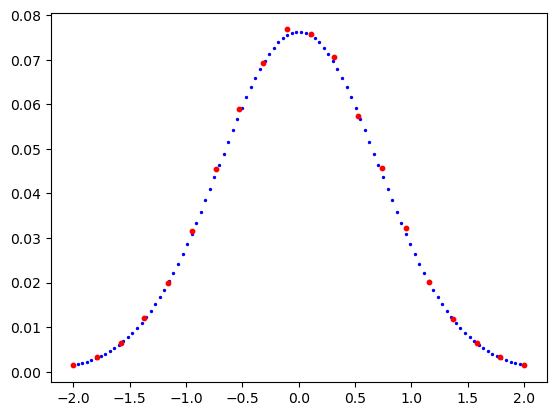

In [10]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue', label='analytical  $T \\rightarrow \\infty$')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red', label='path integral')
plt.xlabel('t')
plt.ylabel('G(t)')
plt.legend()
plt.show()

The error bars are not visible due to the error being very low

If all Qs are greater than $0.01$, it means that all points are statistically significant. 

In [25]:
def check_reliability(results):
    n_unreliable = 0
    for result in propagators_pimc_results:
        if result.Q < 0.01:
            n_unreliable += 1

    if n_unreliable == 0:
        print('All points have a high statistical significance')
    else:
        print(f'{n_unreliable} out of {len(propagators_pimc_results)} points are statistically unreliable')

In [26]:
check_reliability(propagators_pimc_results)

All points have a high statistical significance


# Potential $x^4/2$

In [15]:
def V_x4(x: float):
    return x ** 4 / 2

In [16]:
x4_system = SchrodingerSystem(V=V_x4, T=4, N=8)

Compute the propagator analytically in the limit $T \rightarrow \infty$

In [17]:
propagators_exact = x4_system.compute_propagator_from_ground_state(x_exact)
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc, lower_bound=-4, upper_bound=4, neval=10000)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

Computing...
Took 0.0500340461730957


Compute it using the path integration

In [ ]:
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc, lower_bound=-4, upper_bound=4, neval=10000)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

In [27]:
check_reliability(propagators_pimc_results)

All points have a high statistical significance


Now plot the propagator computed in the two ways

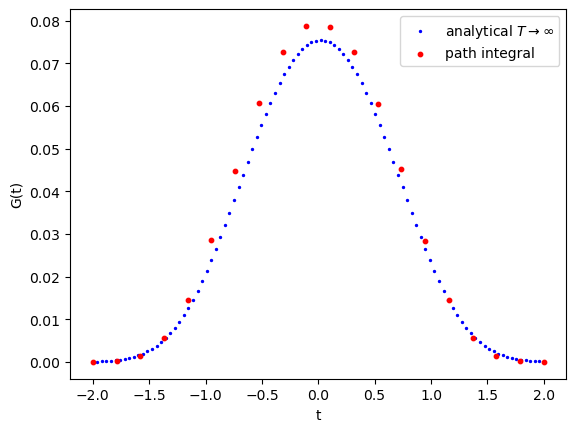

In [22]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue', label='analytical $T \\rightarrow \\infty$')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red', label='path integral')
plt.xlabel('t')
plt.ylabel('G(t)')
plt.legend()
plt.show()

The points are shifted in the propagator computed via path integration because of renormalization effects.